In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.linear_model import LinearRegression
import pylab as pl

seaborn.set()

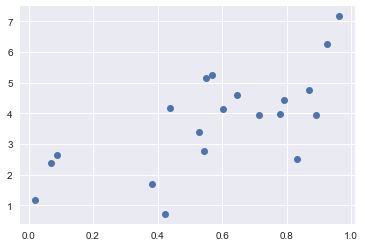

In [2]:
# Create some simple data
np.random.seed(0)
X = np.random.random(size=(20,1))
y = 3 * X.squeeze() + 2 + np.random.randn(20)
plt.plot(X.squeeze(), y, 'o')

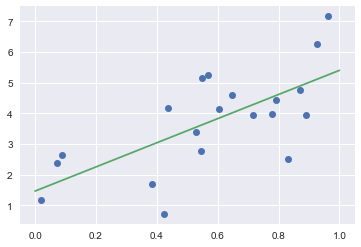

In [3]:
model = LinearRegression()
model.fit(X, y)

# Plot the data and the model prediction
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit)

In [4]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit([[0,0],[1,1],[2,2]], [0,1,2])
LinearRegression(copy_X=True, fit_intercept=True,
                n_jobs=1,normalize=False)
reg.coef_

array([0.5, 0.5])

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07


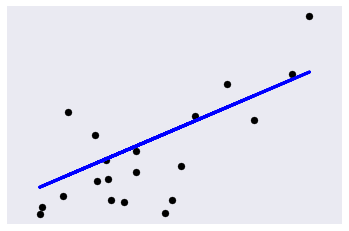

In [9]:
## 下面展示一个线性回归的例子
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

#Load the diabetes dataset 加载diabetes数据集
diabetes = datasets.load_diabetes()

#Use only one feature  仅仅使用其中一个特征
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets 
# 将数据集划分为训练集和测试集
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]


diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]


# Create linear regression object 创建线性回归对象
regr = linear_model.LinearRegression()

# Train the model using the training sets 使用训练集训练模型
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set 使用训练集预测模型
diabetes_y_pred = regr.predict(diabetes_X_test)

## The coefficients
print('Coefficients: \n', regr.coef_)

## The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test,
                                                     diabetes_y_pred))
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

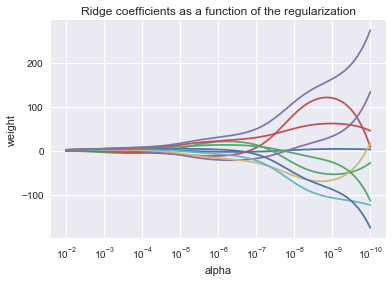

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

X = 1. / (np.arange(1,11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
## Display results
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel('alpha')
plt.ylabel('weight')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()